In [1]:
import pandas as pd
import numpy as np 
import matplotlib 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import utils

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(font_scale=1.5, style="whitegrid")
sns.set_context('talk') 
import matplotlib.style as style
style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
data = pd.read_csv("GHG_IPCC_Can_Prov_Terr.csv")
data.head()

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit
0,1990,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,False,93982.35593,1.773294376,44.3323594,1.650737837,491.9198754,0,0,0,0,94518.60816,kt
1,1990,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,False,17300.2406,0.428833583,10.72083959,0.166112112,49.50140941,0,0,0,0,17360.46285,kt
2,1990,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,False,29098.29673,58.58394458,1464.598614,0.655721149,195.4049023,0,0,0,0,30758.30024,kt
3,1990,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,False,4625.538368,0.096105246,2.402631156,0.084963544,25.31913619,0,0,0,0,4653.260136,kt
4,1990,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,False,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,0,0,0,0,4946.425758,kt


### EDA

In [3]:
data.columns

Index(['Year', 'Region', 'CategoryID', 'Source', 'Category', 'Sub-category',
       'Sub-sub-category', 'Total', 'CO2', 'CH4', 'CH4 (CO2eq)', 'N2O',
       'N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq', 'Unit'],
      dtype='object')

In [4]:
len(cols)

NameError: name 'cols' is not defined

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              37825 non-null  int64 
 1   Region            37825 non-null  object
 2   CategoryID        37825 non-null  int64 
 3   Source            37825 non-null  object
 4   Category          35275 non-null  object
 5   Sub-category      24225 non-null  object
 6   Sub-sub-category  12325 non-null  object
 7   Total             37825 non-null  bool  
 8   CO2               37825 non-null  object
 9   CH4               37825 non-null  object
 10  CH4 (CO2eq)       37825 non-null  object
 11  N2O               37825 non-null  object
 12  N2O (CO2eq)       37825 non-null  object
 13  HFCs              37825 non-null  object
 14  PFCs              37825 non-null  object
 15  SF6               37825 non-null  object
 16  NF3               37825 non-null  object
 17  CO2eq       

In [6]:
data.describe()

,Year,CategoryID
count,37825.000000,37825.000000
mean,2005.232941,348.808989
std,8.884729,185.751887
min,1990.000000,0.000000
25%,1998.000000,220.000000
50%,2005.000000,310.000000
75%,2013.000000,450.000000
max,2020.000000,760.000000


In [7]:
data.dropna()

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit
4,1990,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,False,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,0,0,0,0,4946.425758,kt
5,1990,Canada,142,Energy,Stationary Combustion Sources,Manufacturing Industries,Non-Ferrous Metals,False,3295.313674,0.068901313,1.722532823,0.046320547,13.80352314,0,0,0,0,3310.83973,kt
6,1990,Canada,143,Energy,Stationary Combustion Sources,Manufacturing Industries,Chemical,False,8216.756063,0.165957782,4.148944558,0.142286775,42.401459,0,0,0,0,8263.306466,kt
7,1990,Canada,144,Energy,Stationary Combustion Sources,Manufacturing Industries,Pulp and Paper,False,14232.91059,1.487255858,37.18139644,0.723717723,215.6678814,0,0,0,0,14485.75987,kt
8,1990,Canada,145,Energy,Stationary Combustion Sources,Manufacturing Industries,Cement,False,3957.736998,0.115250981,2.88127452,0.045565342,13.57847191,0,0,0,0,3974.196744,kt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37725,2020,Alberta,241,Energy,Transport,Marine,Domestic Navigation,False,0,0,0,0,0,0,0,0,0,0,kt
37751,2020,Yukon,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt
37776,2020,Northwest Territories,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt
37801,2020,Nunavut,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt


In [8]:
df1 = data[['Year', 'Region', 'CO2', 'CH4', 'CH4 (CO2eq)', 'N2O', 'N2O (CO2eq)', 'CO2eq']]
df1.head()

,Year,Region,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),CO2eq
0,1990,Canada,93982.35593,1.773294376,44.3323594,1.650737837,491.9198754,94518.60816
1,1990,Canada,17300.2406,0.428833583,10.72083959,0.166112112,49.50140941,17360.46285
2,1990,Canada,29098.29673,58.58394458,1464.598614,0.655721149,195.4049023,30758.30024
3,1990,Canada,4625.538368,0.096105246,2.402631156,0.084963544,25.31913619,4653.260136
4,1990,Canada,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,4946.425758


In [9]:
df1 = df1.dropna()

In [10]:
df1

,Year,Region,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),CO2eq
0,1990,Canada,93982.35593,1.773294376,44.3323594,1.650737837,491.9198754,94518.60816
1,1990,Canada,17300.2406,0.428833583,10.72083959,0.166112112,49.50140941,17360.46285
2,1990,Canada,29098.29673,58.58394458,1464.598614,0.655721149,195.4049023,30758.30024
3,1990,Canada,4625.538368,0.096105246,2.402631156,0.084963544,25.31913619,4653.260136
4,1990,Canada,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,4946.425758
...,...,...,...,...,...,...,...,...
37820,2020,Nunavut,0,0,0,0,0,0
37821,2020,Nunavut,0,0,0,0,0,0
37822,2020,Nunavut,0,0,0,0,0,0
37823,2020,Nunavut,0,0,0,0,0,0


### Feature Engineering ###

In [11]:
df1['CO2'].isna().sum()

0

In [12]:
df1 = df1[df1['CO2'].str.contains('x')==False]
df1 = df1[df1['CO2eq'].str.contains('x')==False]

In [13]:
df1.columns

Index(['Year', 'Region', 'CO2', 'CH4', 'CH4 (CO2eq)', 'N2O', 'N2O (CO2eq)',
       'CO2eq'],
      dtype='object')

In [14]:
df1 = df1.astype({'CO2':'float','CH4':'float', 'CH4 (CO2eq)':'float', 'N2O':'float', 'N2O (CO2eq)':'float', 'CO2eq':'float'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37824
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         37427 non-null  int64  
 1   Region       37427 non-null  object 
 2   CO2          37427 non-null  float64
 3   CH4          37427 non-null  float64
 4   CH4 (CO2eq)  37427 non-null  float64
 5   N2O          37427 non-null  float64
 6   N2O (CO2eq)  37427 non-null  float64
 7   CO2eq        37427 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ MB


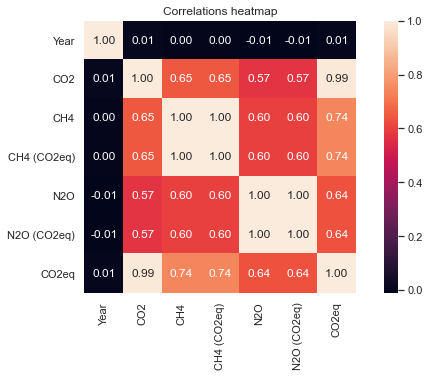

In [15]:
#Numerical columns to find out correlation
cols = ['Year','CO2', 'CH4', 'CH4 (CO2eq)', 'N2O', 'N2O (CO2eq)', 'CO2eq']

#Find out correlation between columns and plot
corrs = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')
plt.show()

<h2> Exploring parameter settings using GridSearchCV on Random Forest & Gradient Boosting Classifier. </h2>
Use Xgboost instead of Gradient Boosting if it's taking a very long time in
GridSearchCV

In [16]:
#Explore SVM, RF, GB

token = [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
province_list = df1.province.unique().tolist()
print(province_list)
print(len(province_list))



AttributeError: 'DataFrame' object has no attribute 'province'

In [17]:
# mapping = {'Quebec': 1, 'Alberta': 2, 'Ontario': 3, 'British Columbia': 4, 'New Brunswick': 5, 'Saskatchewan': 6, 'Manitoba': 7
#            , 'Nova Scotia': 8, 'Newfoundland and Labrador': 9, 'Prince Edward Island': 10, 'Northwest Territories': 11
#            , 'Nunavut': 12, 'Yukon': 13}
# df1['map_province'] = df1['province'].map(mapping)
# df1

In [16]:
df1.columns = ['year', 'region', 'co2', 'ch4', 'ch4(co2eq)', 'n2o', 'n2o(co2eq)', 'total_emissions']

In [17]:
df1.head()

,year,region,co2,ch4,ch4(co2eq),n2o,n2o(co2eq),total_emissions
0,1990,Canada,93982.355930,1.773294,44.332359,1.650738,491.919875,94518.608160
1,1990,Canada,17300.240600,0.428834,10.720840,0.166112,49.501409,17360.462850
2,1990,Canada,29098.296730,58.583945,1464.598614,0.655721,195.404902,30758.300240
3,1990,Canada,4625.538368,0.096105,2.402631,0.084964,25.319136,4653.260136
4,1990,Canada,4904.693043,0.152365,3.809113,0.127260,37.923602,4946.425758


In [18]:
df1 = df1[df1.total_emissions != 0]
df1.tail()

,year,region,co2,ch4,ch4(co2eq),n2o,n2o(co2eq),total_emissions
31501,2020,Nunavut,98.518425,0.009122,0.228048,0.002606,0.776666,99.523140
31502,2020,Nunavut,49.314879,0.024997,0.624920,0.002326,0.693249,50.633048
31505,2020,Nunavut,0.595628,0.000000,0.000000,0.001854,0.552387,20.382438
31506,2020,Nunavut,0.016795,0.000000,0.000000,0.000000,0.000000,0.016795
31511,2020,Nunavut,0.080872,1.311278,32.781944,0.001353,0.403106,33.265922


In [19]:
np.nan(df1)

TypeError: 'float' object is not callable

In [21]:
X = df1[['year','region', 'co2', 'ch4', 'ch4(co2eq)', 'n2o', 'n2o(co2eq)']]
y = np.log1p(df1['total_emissions'])

In [22]:
X

,year,region,co2,ch4,ch4(co2eq),n2o,n2o(co2eq)
0,1990,Canada,93982.355930,1.773294,44.332359,1.650738,491.919875
1,1990,Canada,17300.240600,0.428834,10.720840,0.166112,49.501409
2,1990,Canada,29098.296730,58.583945,1464.598614,0.655721,195.404902
3,1990,Canada,4625.538368,0.096105,2.402631,0.084964,25.319136
4,1990,Canada,4904.693043,0.152365,3.809113,0.127260,37.923602
...,...,...,...,...,...,...,...
31501,2020,Nunavut,98.518425,0.009122,0.228048,0.002606,0.776666
31502,2020,Nunavut,49.314879,0.024997,0.624920,0.002326,0.693249
31505,2020,Nunavut,0.595628,0.000000,0.000000,0.001854,0.552387
31506,2020,Nunavut,0.016795,0.000000,0.000000,0.000000,0.000000


In [23]:
y

0        11.456563
1         9.762008
2        10.333948
3         8.445538
4         8.506623
           ...    
31501     4.610388
31502     3.944162
31505     3.062570
31506     0.016656
31511     3.534151
Name: total_emissions, Length: 27333, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [29]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


In [30]:
y_val

6061      5.800917
12534     6.705479
4995      6.992139
2475     10.728807
28726     8.403689
           ...    
20889     1.302416
14135     8.768735
18480     2.557557
21592     8.738902
29288     7.243147
Name: total_emissions, Length: 5467, dtype: float64

In [31]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
train_province_oneHot = vectorizer.fit_transform(X_train['region'].values)

val_province_oneHot = vectorizer.transform(X_val['region'].values)
test_province_oneHot = vectorizer.transform(X_test['region'].values)

In [39]:
train_province_oneHot.todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [33]:
#cols = set(X_train.columns.values)
#skip_cols = {'region'}
  
#3cols_to_normalize = cols - skip_cols
#print(cols_to_normalize)
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (feature_name in cols_to_normalize):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

{'n2o(co2eq)', 'ch4', 'ch4(co2eq)', 'co2', 'n2o'}


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16399 entries, 10903 to 27027
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      16399 non-null  object 
 1   co2         16399 non-null  float64
 2   ch4         16399 non-null  float64
 3   ch4(co2eq)  16399 non-null  float64
 4   n2o         16399 non-null  float64
 5   n2o(co2eq)  16399 non-null  float64
dtypes: float64(5), object(1)
memory usage: 896.8+ KB


In [91]:
train_features = np.array(normalize(X_train[['n2o(co2eq)', 'ch4', 'ch4(co2eq)', 'co2', 'n2o']]), dtype=float)
test_features = np.array(normalize(X_test[['n2o(co2eq)', 'ch4', 'ch4(co2eq)', 'co2', 'n2o']]), dtype=float)
val_features = np.array(normalize(X_val[['n2o(co2eq)', 'ch4', 'ch4(co2eq)', 'co2', 'n2o']]), dtype=float)

print(train_features)

[[4.01979485e-05 1.43436781e-06 1.43436777e-06 2.59438274e-01
  4.01979522e-05]
 [2.85191198e-04 3.38914072e-04 3.38914072e-04 2.59860652e-01
  2.85191195e-04]
 [1.10863658e-04 1.76488633e-06 1.76488642e-06 2.60126894e-01
  1.10863661e-04]
 ...
 [3.10652056e-03 6.61715258e-03 6.61715258e-03 2.65971298e-01
  3.10652056e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.59225147e-01
  0.00000000e+00]
 [3.25704525e-04 5.52110687e-03 5.52110687e-03 2.59249041e-01
  3.25704525e-04]]


In [92]:
from scipy.sparse import hstack

# stack dense feature matrix with categorical and text vectors
# dense feature matrix contains all normalised numerical features
X_train_features = hstack((train_province_oneHot, train_features)).tocsr()
X_val_features = hstack((val_province_oneHot, val_features)).tocsr()
X_test_features = hstack((test_province_oneHot, test_features)).tocsr()

In [93]:
X_train_features.todense()

matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.43436777e-06, 2.59438274e-01, 4.01979522e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.38914072e-04, 2.59860652e-01, 2.85191195e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.76488642e-06, 2.60126894e-01, 1.10863661e-04],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.61715258e-03, 2.65971298e-01, 3.10652056e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.59225147e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.52110687e-03, 2.59249041e-01, 3.25704525e-04]])

In [69]:
y_train.values

array([5.1559117 , 6.34561573, 6.59015058, ..., 8.75460615, 8.54043693,
       6.57045695])

In [85]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train_labels = imp.fit_transform(y_train.values.reshape(-1, 1))

In [81]:
lab_enc = preprocessing.LabelEncoder()
y_train_labels2 = lab_enc.fit_transform(y_train_labels)

In [88]:
y_test_labels = lab_enc.fit_transform(y_test)
y_val_lables = lab_enc.fit_transform(y_val)

In [86]:
y_train_labels

array([[5.1559117 ],
       [6.34561573],
       [6.59015058],
       ...,
       [8.75460615],
       [8.54043693],
       [6.57045695]])

In [48]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [63]:
np.any(np.isnan(y_train.values))

True

In [84]:
#GridSearch with RandomForest Classifier
rf = RandomForestClassifier()
parameters = {
    'n_estimators':[5, 50, 250],
    'max_depth': [2, 4, 8, None],
}

cv = GridSearchCV(rf, parameters, cv=3)
cv.fit(X_train_features, y_train_labels)

print_results(cv)
print(" ")
print("Best Estimator is : "+str(cv.best_estimator_))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\admin\anaconda3\lib\s

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=

BEST PARAMS: {'max_depth': None, 'n_estimators': 5}

0.006 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.006 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.006 (+/-0.0) for {'max_depth': 2, 'n_estimators': 250}
0.007 (+/-0.001) for {'max_depth': 4, 'n_estimators': 5}
0.009 (+/-0.001) for {'max_depth': 4, 'n_estimators': 50}
0.009 (+/-0.001) for {'max_depth': 4, 'n_estimators': 250}
0.009 (+/-0.0) for {'max_depth': 8, 'n_estimators': 5}
0.014 (+/-0.001) for {'max_depth': 8, 'n_estimators': 50}
0.018 (+/-0.001) for {'max_depth': 8, 'n_estimators': 250}
0.023 (+/-0.001) for {'max_depth': None, 'n_estimators': 5}
nan (+/-nan) for {'max_depth': None, 'n_estimators': 50}
nan (+/-nan) for {'max_depth': None, 'n_estimators': 250}
 
Best Estimator is : RandomForestClassifier(n_estimators=5)


In [90]:
#Evaluation on Validation Set

y_pred = rf.predict(X_val)
accuracy = round(accuracy_score(y_val, y_pred), 3)
precision = round(precision_score(y_val, y_pred, average='micro'), 3)
recall = round(recall_score(y_val, y_pred, average='micro'), 3)
print('{} -- Accuracy: {} / Precision: {} / Recall: {}'.format(str(mdl),accuracy,precision,recall))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [73]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
print(data)
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.17491156481011794, 0.26006722553283046, 0.4753169168594856, 0.9130210415816988, 0.3803576262225554, 0.40678602656180063, 0.19757380687096004, 0.45684276871895524, 0.3712408935328456, 0.25384032376117216, 0.4124450802348719, 0.9598075022967121, 0.2471882617216542, 0.933109701821808, 0.7344540234884683, 0.2879518834056628, 0.1927648466053149, 0.13478742011534373, 0.19415026677561997, 0.17300642545012457, 0.8835603949156126, 0.8354054607099959, 0.8727671909456342, 0.8959475914006146, 0.641971752743072, 0.991088294619222, 0.4252711309549546, 0.5701614973739612, 0.18605195226606208, 0.9531051420280993, 0.08016431505470134, 0.037224321501562074, 0.3186879355701866, 0.534784368392252, 0.9687229145937479, 0.2712802964512028, 0.5515108357318531, 0.49770776790804483, 0.9140178224881551, 0.18656016793587715, 0.09069559796599447, 0.4106126069218685, 0.8973682563310587, 0.6240504662414139, 0.9152508975407011, 0.7918326837664089, 0.8997558350155623, 0.4273432948643253, 0.8838280512069286, 0.40120